<a href="https://colab.research.google.com/github/OmegaJN/KNX/blob/master/Option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[80000, 82500, 85000, 87500, 90000, 92500, 95000, 97500, 100000, 102500, 105000, 107500, 110000, 112500, 115000, 117500, 120000] 
 [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0] 
 [-0.0]


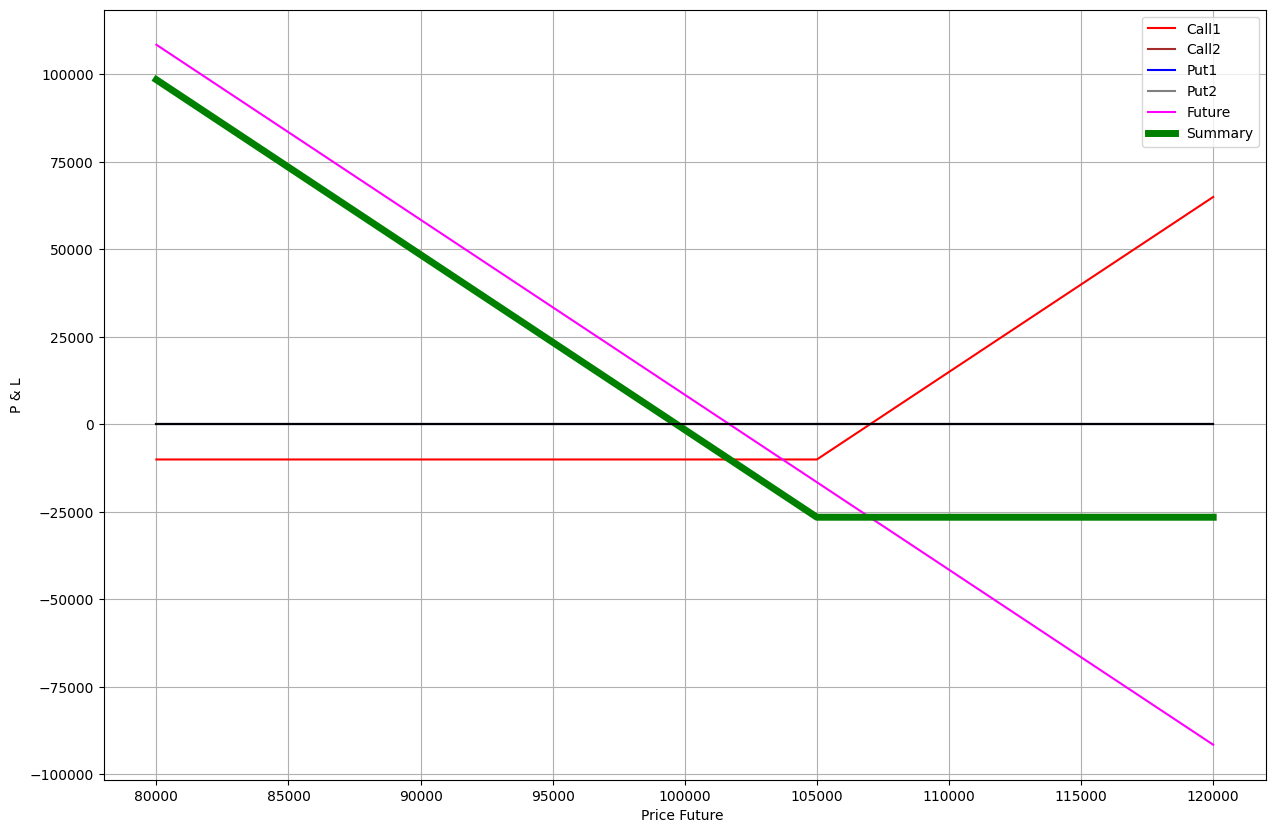

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ========= Strike price (begin, end) =================
pr_begin= 80000
pr_end= 122500

# ========= Параметры опционного портфеля ==============
# ---------- Call -----------------
st = 105000 #"Strike Call Option:"
price_call = 2000 #int(input("Price Call Option:"))
direct_call= 5 #int(input('Call Buy/Sell(+/-):'))

st1 = 105000 #"Strike Call Option:"
price_call1 = 2360 #int(input("Price Call Option:"))
direct1_call2= 0 #int(input('Call Buy/Sell(+/-):'))

# ---------- Put ----------------
st_p= 95000 #int(input('Strike Put Option:'))
p_put= 3530 #int(input('Price Put Option:'))
direct_put= 0 #int(input('Put Buy/Sell(+/-):'))

st_p1 = 105000 #int(input('Strike Put Option:'))
p_put1 = 8590 #int(input('Price Put Option:'))
direct_put1 = 0 #int(input('Put Buy/Sell(+/-):'))

# ----------- Future ----------
p_fut_pos=101700 # input Futures Price
dir_f= -5 # input Futures Positions

price_step=1.0

# ========= ф-ии ========================
def call(x, st, p_call, direct):
  if x < st :
    pnl=-p_call*direct
  else:
    pnl=(-p_call+(x-st))*direct
  return pnl

def put(x, st_p, p_put,direct_put):
  if x > st_p :
    pnl_p=-p_put*direct_put
  else:
    pnl_p=(-p_put+(st_p-x))*direct_put
  return pnl_p
#============== Расчеты =====================
x_values = []
y_values_call = []
y_values_call2 = []
y_values_put = []
y_values_put2 = []
y_values_fut = []
ysum_values = []

for x in range( pr_begin, pr_end, 2500):
  x_values.append(x)
  
  y_call=call(x, st, price_call, direct_call)*price_step
  y_values_call.append(y_call)
  y_call2=call(x, st1, price_call1, direct1_call2)*price_step
  y_values_call2.append(y_call2)
    
  y_put=put(x, st_p, p_put, direct_put)*price_step
  y_values_put.append(y_put)
  y_put2=put(x, st_p1, p_put1, direct_put1)*price_step
  y_values_put2.append(y_put2)

  y_fut=(x-p_fut_pos)*dir_f*price_step
  y_values_fut.append(y_fut)
  
  ysum_values.append(y_call+y_call2+y_put+y_put2+y_fut)

# ========== Greeks =====================
Delta = (ysum_values[1]-ysum_values[0])/(x_values[1]-x_values[0])
Gamma = (ysum_values[2]-2*ysum_values[1]+ysum_values[0])/(x_values[1]-x_values[0])**2
Theta = -(ysum_values[-1]-ysum_values[-2])/(x_values[-1]-x_values[-2])

delta_values = [] 
gamma_values = [] 
theta_values = []

for i in range(1, len(ysum_values)): 
  delta = (ysum_values[i]-ysum_values[i-1])/(x_values[i]-x_values[i-1]) 
  delta_values.append(delta)

for i in range(1, len(ysum_values)-1): 
  gamma = (ysum_values[i+1]-2*ysum_values[i]+ysum_values[i-1])/(x_values[i]-x_values[i-1])**2 
  gamma_values.append(gamma)

theta = -(ysum_values[-1]-ysum_values[-2])/(x_values[-1]-x_values[-2]) 
theta_values.append(theta)

print(x_values, '\n', delta_values, '\n', gamma_values, '\n',theta_values)

# ============= plot ===================
plt.rcParams ['figure.figsize'] = [15, 10]
plt.plot(x_values, y_values_call, color='red', label='Call1')
plt.plot(x_values, y_values_call2, color='brown', label='Call2')
plt.plot(x_values, y_values_put, color='blue', label='Put1')
plt.plot(x_values, y_values_put2, color='gray', label='Put2')
plt.plot(x_values, y_values_fut, color='magenta', label='Future')
plt.plot(x_values, ysum_values, linewidth= 5, color='green', label='Summary')
plt.plot(x_values, [1]*len(x_values), color='black')
plt.xlabel('Price Future ')
plt.ylabel('P & L')
plt.grid()
plt.legend()
plt.show()

Простой расчет портфеля опционов состоящий из Двух позиций Call & Put.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pr_begin=60000
pr_end=140000

st = int(input("Strike Call Option:")) 
price_call = int(input("Price Call Option:"))
direct=int(input('Call Buy/Sell(+/-):'))
#st=100000
#price_call=5000
st_p=int(input('Strike Put Option:'))
p_put=int(input('Price Put Option:'))
direct_put=int(input('Put Buy/Sell(+/-):'))

def call(x, st, p_call, direct):
  if x < st :
    pnl=-price_call*direct
  else:
    pnl=(-price_call+(x-st))*direct
  return pnl

def put(x, st_p, p_put,direct_put):
  if x > st_p :
    pnl_p=-p_put*direct_put
  else:
    pnl_p=(-p_put+(st_p-x))*direct_put
  return pnl_p

x_values = []
y_values = []
y1_values = []
ysum_values = []

for x in range(pr_begin,pr_end):
  y=call(x, st, price_call, direct)
  x_values.append(x)
  y_values.append(y)
  y1=put(x, st_p, p_put, direct_put)
  y1_values.append(y1)
  ysum_values.append(y+y1)

plt.plot(x_values, y_values, color='red', label='Call')
plt.plot(x_values, y1_values, color='blue', label='Put')
plt.plot(x_values, ysum_values, color='green', label='Sum')
plt.plot(x_values, [1]*len(x_values), color='black')
plt.xlabel('Price Future ')
plt.ylabel('P & L')
plt.grid()
plt.legend()
plt.show()

KeyboardInterrupt: ignored

60000
140000


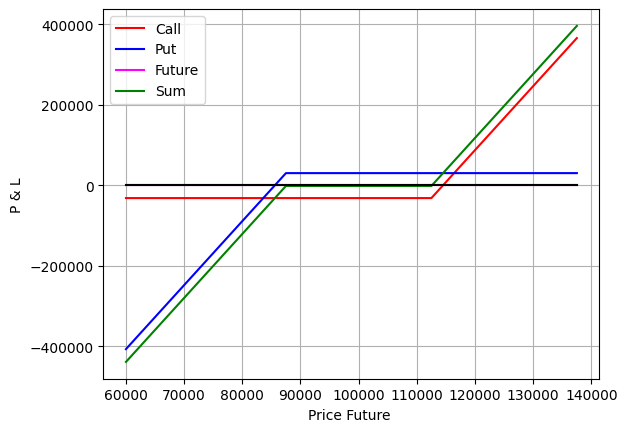

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pr_begin= 60000
pr_end= 140000
print(pr_begin)
print(pr_end)

st = 112500 #"Strike Call Option:"
price_call = 2000 #int(input("Price Call Option:"))
direct= 10 #int(input('Call Buy/Sell(+/-):'))
st_p= 87500 #int(input('Strike Put Option:'))
p_put= 1900 #int(input('Price Put Option:'))
direct_put= -10 #int(input('Put Buy/Sell(+/-):'))
dir_f= 0 # input Futures Positions
price_step=1.589
p_fut_pos=98000 # input Futures Price

def call(x, st, p_call, direct):
  if x < st :
    pnl=-price_call*direct
  else:
    pnl=(-price_call+(x-st))*direct
  return pnl

def put(x, st_p, p_put,direct_put):
  if x > st_p :
    pnl_p=-p_put*direct_put
  else:
    pnl_p=(-p_put+(st_p-x))*direct_put
  return pnl_p

x_values = []
y_values = []
y1_values = []
yf_values = []
ysum_values = []

for x in range( pr_begin, pr_end, 2500):
  y=call(x, st, price_call, direct)*price_step
  x_values.append(x)
  y_values.append(y)
  y1=put(x, st_p, p_put, direct_put)*price_step
  y1_values.append(y1)
  yf=(x-p_fut_pos)*dir_f*price_step
  yf_values.append(yf)
  ysum_values.append(y+y1+yf)

plt.plot(x_values, y_values, color='red', label='Call')
plt.plot(x_values, y1_values, color='blue', label='Put')
plt.plot(x_values, yf_values, color='magenta', label='Future')
plt.plot(x_values, ysum_values, color='green', label='Sum')
plt.plot(x_values, [1]*len(x_values), color='black')
plt.xlabel('Price Future ')
plt.ylabel('P & L')
plt.grid()
plt.legend()
plt.show()

Вычисляет стоимость европейского опциона по модели Блэка-Шоулза:

In [ ]:
from math import log, sqrt, exp
from scipy.stats import norm

def black_scholes(option_type, s, k, t, r, sigma):
    """
    Вычисляет стоимость европейского опциона по модели Блэка-Шоулза.

    Parameters
    ----------
    option_type: str {'call', 'put'}
        Тип опциона
    s : float
        Текущая цена базового актива
    k : float
        Цена страйка
    t : float
        Срок до истечения опциона в годах
    r : float
        Безрисковая процентная ставка
    sigma : float
        Волатильность

    Returns
    -------
    float
        Стоимость опциона
    """

    d1 = (log(s / k) + (r + 0.5 * sigma**2) * t) / (sigma * sqrt(t))
    d2 = d1 - sigma * sqrt(t)
    
    if option_type == 'call':
        option_price = s * norm.cdf(d1) - k * exp(-r * t) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = k * exp(-r * t) * norm.cdf(-d2) - s * norm.cdf(-d1)
    else:
        raise ValueError('Некорректный тип опциона')

    return option_price
option_price = black_scholes('call', 96940, 97500, 0.19, 0.075, 0.27)
print("Стоимость опциона Call:", option_price)
option_price = black_scholes('put', 96940, 97500, 0.19, 0.075, 0.27)
print("Стоимость опциона Put:", option_price)

Стоимость опциона Call: 4951.165394331321
Стоимость опциона Put: 4131.642836584542


Для расчета цены американского опциона можно использовать алгоритм Биномиального дерева. Пример кода на Python:

In [ ]:
# Для расчета цены американского опциона можно использовать алгоритм Биномиального дерева. 

import numpy as np

def american_option(S, K, r, sigma, T, N, option_type='call'):
    """
    Расчет цены американского опциона методом Биномиального дерева.
    
    S - текущая цена базового актива
    K - страйк цена
    r - процентная ставка без риска
    sigma - волатильность
    T - время до истечения опциона в годах
    N - количество временных шагов в дереве
    option_type - тип опциона (call или put)
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Создаем дерево цен базового актива
    stock_prices = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            stock_prices[j, i] = round(S * d ** j * u ** (i - j), 2)

    # Вычисляем опционную ценность на каждом временном шаге
    option_values = np.zeros((N + 1, N + 1))
    if option_type == 'call':
        option_values[:, N] = np.maximum(stock_prices[:, N] - K, 0)
    elif option_type == 'put':
        option_values[:, N] = np.maximum(K - stock_prices[:, N], 0)

    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            if option_type == 'call':
                exercise_value = stock_prices[j, i] - K
            elif option_type == 'put':
                exercise_value = K - stock_prices[j, i]

            option_values[j, i] = np.maximum(exercise_value,
                                             np.exp(-r * dt) * (p * option_values[j, i+1] + (1 - p) * option_values[j+1, i+1]))
    return option_values[0, 0]

#Пример использования:
# S - текущая цена базового актива
S = 96940
# K - страйк цена
K = 97500
# r - процентная ставка без риска (0.075 - 7.5 %)
r = 0.075
# sigma - волатильность (0.3 - 30 %)
sigma = 0.27
# T - время до истечения опциона в годах
T = 0.19
# N - количество временных шагов в дереве
N = 100

call_price = american_option(S, K, r, sigma, T, N, 'call')
print('Цена Call опциона:', round(call_price, 2))

put_price = american_option(S, K, r, sigma, T, N, 'put')
print('Цена Put опциона:', round(put_price, 2))


Цена Call опциона: 4956.38
Цена Put опциона: 4269.23


Метод Монте-Карло. Расчет стоимости американских опционов.

In [ ]:
import numpy as np

def monte_carlo(S, K, r, t, sigma, option_type, n_simulations=100000):
    dt = 1/365
    S_t = np.zeros(n_simulations)
    S_t.fill(S)
    for i in range(int(t/dt)):
        random = np.random.normal(size=n_simulations)
        S_t *= np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*random)
    if option_type == 'call':
        payoff = np.maximum(S_t - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - S_t, 0)
    price = np.mean(payoff) * np.exp(-r*t)
    return price
"""    
def monte_carlo(S, K, r, t, sigma, option_type, n_simulations=100000):
    dt = 1/365
    S_t = np.zeros(n_simulations)
    S_t.fill(S)
    for i in range(int(t/dt)):
        random = np.random.normal(size=n_simulations)
        S_t *= np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*random)
    payoff = None
    if option_type == 'call':
        payoff = np.maximum(S_t - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - S_t, 0)
    if payoff is None:
        return None
    price = np.mean(payoff) * np.exp(-r*t)
    return price
"""
# Пример использования:

S = 98040    # current stock price
K = 97500    # strike price
t = 0.3      # time to maturity in years
r = 0.075   # risk-free interest rate
sigma = 0.27    # volatility
option_type = 'call' # option type ('call' or 'put')
n_simulations=100000 # количество симуляций в методе Монте-Карло

Option_price_Monte_carlo = monte_carlo(S, K, r, t, sigma, 'call', n_simulations)
print(f"Option Call price from Monte carlo is: {Option_price_Monte_carlo: 0.2f} руб.")


Option_price_Monte_carlo = monte_carlo(S, K, r, t, sigma, 'put', n_simulations)
print(f"Option Put price from Monte carlo is: {Option_price_Monte_carlo: 0.2f} руб.")

Option Call price from Monte carlo is:  7166.58 руб.
Option Put price from Monte carlo is:  4453.85 руб.


Формула для расчета волатильности для американских опционов в Python:


In [ ]:
from math import log, sqrt, exp
from scipy.stats import norm

def implied_volatility(S, K, T, r, market_price, option_type):
    """
    :param S: текущая цена базового актива
    :param K: цена страйк опциона
    :param T: время до истечения опциона в годах
    :param r: безрисковая процентная ставка
    :param market_price: рыночная цена опциона
    :param option_type: тип опциона ('call' или 'put')
    :return: уровень неявной волатильности
    """
    
    # Функция Блэка-Шоулза для оценки стоимости опциона
    def black_scholes(S, K, T, r, sigma, option_type):
        d1 = (log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * sqrt(T))
        d2 = d1 - sigma * sqrt(T)
        if option_type == 'call':
            return S * norm.cdf(d1) - K * exp(-r*T) * norm.cdf(d2)
        elif option_type == 'put':
            return K * exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        
    # Используем метод бисекции для нахождения уровня подразумеваемой волатильности
    def bisection(S, K, T, r, market_price, option_type):
        lower_vol, upper_vol = 0.0001, 1
        precision = 0.0001
        
        while (upper_vol - lower_vol) > precision:
            mid_vol = (lower_vol + upper_vol) / 2
            mid_price = black_scholes(S, K, T, r, mid_vol, option_type)
            if mid_price > market_price:
                upper_vol = mid_vol 
            else:
                lower_vol = mid_vol
        
        return mid_vol
    
    return bisection(S, K, T, r, market_price, option_type)

# Пример использования:

S = 96940    # current stock price
K = 97500    # strike price
T = 0.19      # time to maturity in years
r = 0.075   # risk-free interest rate
market_price = 5760    # market price of the option
option_type = 'call' # option type ('call' or 'put')

implied_vol = implied_volatility(S, K, T, r, market_price, option_type)

print(f"The implied volatility is: {implied_vol:.2%}")


The implied volatility is: 31.84%


Код для расчетов Дельты, Гаммы, Теты, Ро в Python будет выглядеть следующим образом:
В этом коде мы используем функции `norm.cdf()` и `norm.pdf()` из модуля `scipy.stats`, чтобы рассчитать значения функций нормального распределения. Чтобы использовать этот код, необходимо установить библиотеку `scipy`.

In [ ]:
import math
import scipy
from scipy.stats import norm

# Параметры опциона 
S = 96940 # Текущая цена акции
K = 97500 # Цена страйк
r = 0.075 # Безрисковая процентная ставка (5%)
sigma = 0.270 # Волатильность (20%)
T = 0.19 # Время до истечения опциона (1 год)

# Расчет дельты
d1 = (math.log(S/K) + (r + sigma**2/2)*T) / (sigma*math.sqrt(T))
delta = math.exp(-r*T) * norm.cdf(d1)

# Расчет гаммы
d2 = d1 - sigma*math.sqrt(T)
gamma = math.exp(-r*T) * norm.pdf(d1) / (S * sigma * math.sqrt(T))

# Расчет теты
d3 = (math.log(S/K) + (r + sigma**2/2)*(T-1/365)) / (sigma*math.sqrt(T-1/365))
d4 = (math.log(S/K) + (r + sigma**2/2)*(T+1/365)) / (sigma*math.sqrt(T+1/365))
theta = -(S * math.exp(-r*T) * norm.pdf(d1) * sigma / (2 * math.sqrt(T))) - r*K*math.exp(-r*T)*norm.cdf(-d2) 

# Расчет ро
d5 = (math.log(S/K) + (r + sigma**2/2)*T) / (sigma*math.sqrt(T))
d6 = (math.log(S/K) + (r + sigma**2/2)*T) / (sigma*math.sqrt(T))
rho = K * T * math.exp(-r*T)*norm.cdf(d6)

# Вывод результатов
print(f"Дельта: {delta:.4f}")
print(f"Гамма: {gamma:.4f}")
print(f"Тета: {theta:.4f}")
print(f"Ро: {rho:.4f}")



Дельта: 0.5443
Гамма: 0.0000
Тета: -15273.5680
Ро: 10083.0402


In [ ]:
from math import log, sqrt, exp
from scipy.stats import norm

def d1(S, K, r, sigma, T):
    return (log(S/K) + (r + sigma**2/2)*T) / (sigma*sqrt(T))

def d2(S, K, r, sigma, T):
    return d1(S, K, r, sigma, T) - sigma*sqrt(T)

def delta(S, K, r, sigma, T, option_type):
    if option_type == 'call':
        return norm.cdf(d1(S, K, r, sigma, T))
    elif option_type == 'put':
        return -norm.cdf(-d1(S, K, r, sigma, T))

def gamma(S, K, r, sigma, T):
    return norm.pdf(d1(S, K, r, sigma, T)) / (S*sigma*sqrt(T))

def theta(S, K, r, sigma, T, option_type):
    d1_val = d1(S, K, r, sigma, T)
    d2_val = d2(S, K, r, sigma, T)
    if option_type == 'call':
        return (-S*norm.pdf(d1_val)*sigma)/(2*sqrt(T)) - r*K*exp(-r*T)*norm.cdf(d2_val)
    elif option_type == 'put':
        return (-S*norm.pdf(d1_val)*sigma)/(2*sqrt(T)) + r*K*exp(-r*T)*norm.cdf(-d2_val)

def rho(S, K, r, sigma, T, option_type):
    d2_val = d2(S, K, r, sigma, T)
    if option_type == 'call':
        return K*T*exp(-r*T)*norm.cdf(d2_val)
    elif option_type == 'put':
        return -K*T*exp(-r*T)*norm.cdf(-d2_val)

#Пример использования:
S = 96940  # Underlying asset price
K = 97500  # Strike price
r = 0.075  # Risk-free interest rate
sigma = 0.27  # Volatility
T = 0.19  # Time to maturity

# Call option
option_type = 'call'
print("Delta:", delta(S, K, r, sigma, T, option_type))
print("Gamma:", gamma(S, K, r, sigma, T))
print("Theta:", theta(S, K, r, sigma, T, option_type))
print("Rho:", rho(S, K, r, sigma, T, option_type))

# Put option
option_type = 'put'
print("Delta:", delta(S, K, r, sigma, T, option_type))
print("Gamma:", gamma(S, K, r, sigma, T))
print("Theta:", theta(S, K, r, sigma, T, option_type))
print("Rho:", rho(S, K, r, sigma, T, option_type))


Delta: 0.5521053788414801
Gamma: 3.466897678231536e-05
Theta: -15518.044690182169
Rho: 9228.286705806735
Delta: -0.4478946211585199
Gamma: 3.466897678231536e-05
Theta: -8309.008882013177
Rho: -9034.604008221379


Библиотека QuanLib. Расчет греков.

In [ ]:
pip install QuantLib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 95.1 MB/s eta 0:00:00


In [ ]:
from QuantLib.QuantLib import Years
import QuantLib as ql

def calc_greeks(option_type, S, K, r, sigma, T):
    payoff = ql.PlainVanillaPayoff(ql.Option.Call if option_type=='call' else ql.Option.Put, K)
    exercise = ql.EuropeanExercise(ql.Date().todaysDate() + ql.Period(int(T*12), ql.Months))
    underlying = ql.QuoteHandle(ql.SimpleQuote(S))
    risk_free_rate = ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), r, ql.Actual365Fixed()))
    volatility = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(0, ql.TARGET(), sigma, ql.Actual365Fixed()))
    
    process = ql.BlackScholesProcess(underlying, risk_free_rate, volatility)
    option = ql.VanillaOption(payoff, exercise)
    option.setPricingEngine(ql.AnalyticEuropeanEngine(process))
    
    delta = option.delta()
    gamma = option.gamma()
    theta = option.thetaPerDay()
    rho = option.rho()
    
    return (delta, gamma, theta, rho)

# Пример использования    

S = 96940  # Underlying asset price
K = 97500  # Strike price
r = 0.075  # Risk-free interest rate
sigma = 0.27  # Volatility
T = 0.19  # Time to maturity

# Call option
option_type = 'call'
delta, gamma, theta, rho = calc_greeks(option_type, S, K, r, sigma, T)
print("Delta:", delta)
print("Gamma:", gamma)
print("Theta:", theta)
print("Rho:", rho)

# Put option
option_type = 'put'
delta, gamma, theta, rho = calc_greeks(option_type, S, K, r, sigma, T)
print("Delta:", delta)
print("Gamma:", gamma)
print("Theta:", theta)
print("Rho:", rho)


Delta: 0.546395958830056
Gamma: 3.70317764472244e-05
Theta: -44.69358621190283
Rho: 8085.469307765583
Delta: -0.45360404116994374
Gamma: 3.70317764472244e-05
Theta: -24.90888661428148
Rho: -8006.086364966356


In [ ]:
# Расчет америанского опциона

import QuantLib as ql
import math

calendar = ql.Russia()
bussiness_convention = ql.ModifiedFollowing
settlement_days = 0
day_count = ql.Actual365Fixed()

interest_rate = 0.075
calc_date = ql.Date(13,4,2023)
yield_curve = ql.FlatForward(calc_date, 
                             interest_rate,
                             day_count,
                             ql.Compounded,
                             ql.Continuous)

ql.Settings.instance().evaluationDate = calc_date
option_maturity_date = ql.Date(15,6,2023) # Expire day
strike = 97500
spot = 98030 # futures price
volatility = 31/100.
flavor = ql.Option.Call

discount = yield_curve.discount(option_maturity_date)
strikepayoff = ql.PlainVanillaPayoff(flavor, strike)
T = yield_curve.dayCounter().yearFraction(calc_date, 
                                          option_maturity_date)
stddev = volatility*math.sqrt(T)

black = ql.BlackCalculator(strikepayoff, 
                           spot, 
                           stddev, 
                           discount)

print('\n','==== Price option ====')
print ("Option Price", black.value() )

print('\n','==== Greeks Call option ====')
print ("Delta", black.delta(spot) )
print ("Gamma", black.gamma(spot) )
print ("Theta", black.theta(spot, T) )
print ("Vega", black.vega(T) )
print ("Rho", black.rho( T) )

print('\n','==== Greeks Call option ====')
option_type = 'call'
delta, gamma, theta, rho = calc_greeks(option_type, spot, strike, interest_rate, volatility, T)
print("Delta:", delta)
print("Gamma:", gamma)
print("Theta:", theta)
print("Rho:", rho)

print('\n','==== Greeks Put option ====')
option_type = 'put'
delta, gamma, theta, rho = calc_greeks(option_type, spot, strike, interest_rate, volatility, T)
print("Delta:", delta)
print("Gamma:", gamma)
print("Theta:", theta)
print("Rho:", rho)
print('\n','Time to maturity:','\n',T)


 ==== Price option ====
Option Price 5222.36242563987

 ==== Greeks Call option ====
Delta 0.5355530935411573
Gamma 3.102301102301092e-05
Theta -13940.511724450407
Vega 15951.860067117526
Rho 8160.296334396119

 ==== Greeks Call option ====
Delta: 0.581232439528507
Gamma: 3.144423650020245e-05
Theta: -50.28939646817331
Rho: 8548.029249157335

 ==== Greeks Put option ====
Delta: -0.4187675604714932
Gamma: 3.144423650020245e-05
Theta: -30.50469687055194
Rho: -7543.526423574602

 Time to maturity: 
 0.1726027397260274


In [ ]:
import QuantLib as ql 
import matplotlib.pyplot as plt
%matplotlib inline


# Определяем параметры опционов
spot_price = 98030 # Текущая цена базового актива
strike_price = 97500 # Цена исполнения опциона
risk_free_rate = 0.075 # Безрисковая процентная ставка
maturity_date = ql.Date(15, 6, 2023) # Дата погашения опциона
today = ql.Date().todaysDate()
current_date = today # Дата 
volatility = 0.3 # Истинная волатильность базового актива

# Определяем параметры модели
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.January)

# Создаем опцион Call и оцениваем его стоимость
payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike_price)
exercise = ql.AmericanExercise(current_date, maturity_date)
option = ql.VanillaOption(payoff, exercise)

underlying = ql.SimpleQuote(spot_price)
risk_free_curve = ql.FlatForward(maturity_date, risk_free_rate, day_count)

volatility_curve = ql.BlackConstantVol(maturity_date, calendar, volatility, day_count)
process = ql.BlackScholesProcess(ql.QuoteHandle(underlying), ql.YieldTermStructureHandle(risk_free_curve), ql.BlackVolTermStructureHandle(volatility_curve))

riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.05, ql.Actual365Fixed()))
dividendTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.01, ql.Actual365Fixed()))
volatility = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.NullCalendar(), 0.1, ql.Actual365Fixed()))
initialValue = ql.QuoteHandle(ql.SimpleQuote(100))
process = ql.BlackScholesMertonProcess(initialValue, dividendTS, riskFreeTS, volatility)

steps = 200
rng = "pseudorandom" # could use "lowdiscrepancy"
numPaths = 100000

engine = ql.MCAmericanEngine(process, rng, steps, requiredSamples=numPaths)
option.setPricingEngine(engine)

steps = 200
binomial_engine = ql.BinomialVanillaEngine(process, "crr", steps)
option.setPricingEngine(binomial_engine)
print(option.NPV())






0.0


In [ ]:
import QuantLib as ql

# Фиксируем даты
calendar = ql.Russia()
option_date = ql.Date(15, ql.April, 2023) # Current date
evaluation_date = calendar.advance(option_date, ql.Period(-1, ql.Days))

# Определяем параметры модели
day_count = ql.Actual365Fixed()

# Создаем опцион и оцениваем его стоимость
option_type = ql.Option.Put
underlying_price = 98040
strike_price = 97500
expiration_date = ql.Date(15, ql.June, 2023)
volatility = 0.3
dividend_rate = 0.00
risk_free_rate = 0.075

payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(expiration_date)
option = ql.VanillaOption(payoff, exercise)

spot_handle = ql.QuoteHandle(ql.SimpleQuote(underlying_price))
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(evaluation_date, calendar, volatility, day_count)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(evaluation_date, ql.QuoteHandle(ql.SimpleQuote(risk_free_rate)), day_count)
)
flat_dividend_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(evaluation_date, ql.QuoteHandle(ql.SimpleQuote(dividend_rate)), day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, flat_dividend_ts, flat_ts, flat_vol_ts)
option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))

print(f"The option price is: {option.NPV():0.2f}")

# Рассчитываем подразумеваемую волатильность
implied_vol = option.impliedVolatility(option.NPV(), bsm_process)

print(f"Implied volatility: {implied_vol: .2} %")

The option price is: 3954.12
Implied volatility:  0.3 %


В этом примере мы рассчитываем стоимость american опциона на покупку (call option) с параметрами, которые можно увидеть в коде. После этого мы рассчитываем подразумеваемую волатильность для данного опциона.

In [ ]:
import QuantLib as ql

today = ql.Date().todaysDate()
ql.Settings.instance().evaluationDate = today

# Определяем параметры модели
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.January)
calculation_date = ql.Date(13, 4, 2023)
expired_date = ql.Date(15, 6, 2023)

# Определяем инструменты для анализа
spot_price = 98200.0
strike_price = 97500.0
volatility = 0.3
risk_free_rate = 0.075
dividend_rate = 0.0
option_type = ql.Option.Call

payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.AmericanExercise(calculation_date, expired_date)
option = ql.VanillaOption(payoff, exercise)

# Определяем процесс и модель
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)

bsm_process = ql.BlackScholesMertonProcess(
    spot_handle, dividend_yield, flat_ts, flat_vol_ts
)

# Рассчитываем цену опциона
steps = 200
binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
american_option.setPricingEngine(binomial_engine)
print (american_option.NPV())


4017.8182543644075


пример кода на Python для расчета стоимости американского опциона с использованием модели Блэка-Шоулз и определения волатильности через QUANLIB:


In [ ]:
import QuantLib as ql
from QuantLib import MCAmericanEngine, AmericanExercise, PlainVanillaPayoff, BlackScholesMertonProcess, YieldTermStructureHandle, \
    SimpleQuote, QuoteHandle, BlackVolTermStructureHandle, Option


# Определяем параметры модели
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.January)

calculation_date = ql.Date(1, 5, 2023)
option_maturity = ql.Date(1, 7, 2023)

spot_price = 50
strike_price = 55
volatility = 0.25
dividend_rate = 0.0
risk_free_rate = 0.01

payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike_price)
exercise = ql.AmericanExercise(calculation_date, option_maturity)

underlying = ql.SimpleQuote(spot_price)
volatility_quote = ql.SimpleQuote(volatility)
dividend_rate_quote = ql.SimpleQuote(dividend_rate)
risk_free_rate_quote = ql.SimpleQuote(risk_free_rate)

u = ql.QuoteHandle(underlying)
r = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, ql.QuoteHandle(risk_free_rate_quote), day_count))
q = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, ql.QuoteHandle(dividend_rate_quote), day_count))
sigma = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, ql.QuoteHandle(volatility_quote), day_count))

process = ql.BlackScholesMertonProcess(u, q, r, sigma)

option = ql.VanillaOption(payoff, exercise)

mc_traits = ql.MCAmericanEngine(process,1,0.02)
mc_traits.requiredSamples = 1
mc_traits.maxSamples = 1048576
mc_traits.seed = 42
mc_traits.antitheticVariate = True

option.setPricingEngine(ql.MCAmericanEngine(process,traits=mc_traits, timeStepsPerYear=48))

# Рассчитываем стоимость опциона
option_price = option.NPV()

print("Цена американского опциона составляет:", option_price)

# Рассчитываем подразумеваемую волатильность
implied_vol = option.impliedVolatility(option.NPV(), process)

print("Implied volatility: ", implied_vol)

AttributeError: ignored


Если нужно рассчитать волатильность для американского опциона, нужно заменить строку `ql.VanillaOption(payoff, exercise)` в коде выше на `ql.AmericanOption(payoff, exercise)` и удалить строчку `option.setPricingEngine(ql.BaroneAdesiWhaleyEngine(process))`, к тому же, модель расчета Black-Scholes-Merton для американских опционов не подходит, нужно использовать другую модель, например, Longstaff-Schwartz algorithm. 

In [ ]:
from numpy.lib.type_check import real
import QuantLib as ql
import pandas as pd

# Определяем параметры модели
day_count = ql.Actual365Fixed()
calendar = ql.Russia()
calculation_date = ql.Date.todaysDate()
ql.Settings.instance().evaluationDate = calculation_date

# Загрузка данных из таблицы
df = pd.read_csv("Option.csv", sep=",")
df[['Спрос CALL','Предложение CALL', 'Теор. цена CALL', 'Расч. премия CALL', 'Расч. премия PUT', 'Теор. цена PUT', 'Спрос PUT', 'Предложение PUT']] = df[['Спрос CALL','Предложение CALL', 'Теор. цена CALL', 'Расч. премия CALL', 'Расч. премия PUT', 'Теор. цена PUT', 'Спрос PUT', 'Предложение PUT']].replace(",", ".", regex=True)
df[['Страйк']] = df[['Страйк']].replace(",", "", regex=True)
df = df[['Теор. цена CALL', 'Расч. премия CALL','Страйк','Расч. премия PUT', 'Теор. цена PUT']]


spot_price = 98000
strike_price = 125500
expiration_date = ql.Date(15, 6, 2023)
option_type = ql.Option.Call
risk_free_rate = 0.075
dividend_rate = 0.0
option_value = 5300


payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.AmericanExercise(calculation_date, expiration_date)
option = ql.VanillaOption(payoff, exercise)

spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(
        calculation_date, 
        ql.QuoteHandle(ql.SimpleQuote(risk_free_rate)), 
        day_count
    )
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(
        calculation_date, 
        ql.QuoteHandle(ql.SimpleQuote(dividend_rate)), 
        day_count
    )
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(
        calculation_date, 
        calendar, 
        0.2, 
        day_count
    )
)
bsm_process = ql.BlackScholesMertonProcess(
    spot_handle, dividend_yield, flat_ts, flat_vol_ts
)


# Рассчитываем подразумеваемую волатильность
implied_vol = option.impliedVolatility(option_value, bsm_process)

print("Implied volatility: ", implied_vol)


Implied volatility:  0.81768697323652


In [ ]:
"""Для фиксации ошибки и определения проблемы с импортом класса MCAmericanEngine рекомендуется выполнить следующие шаги:

1. Проверьте версию QuantLib. В классе MCAmericanEngine необходима версия QuantLib 1.12 и выше. Если у вас установлена более старая версия, попробуйте обновить ее до последней версии.

2. Убедитесь, что вы импортировали класс MCAmericanEngine правильно. Команда 
"""
import QuantLib as ql 
"""
должна быть выполнена перед использованием класса MCAmericanEngine. 

Вы можете выполнить следующую команду для явного импортирования класса:


from QuantLib import MCAmericanEngine, AmericanExercise, PlainVanillaPayoff, BlackScholesMertonProcess, YieldTermStructureHandle, \
    SimpleQuote, QuoteHandle, BlackVolTermStructureHandle, Option, Option_Call


3. Используйте атрибут и свойства классов правильно. В частности, убедитесь, что атрибут traits (характеристики) передается корректно в качестве аргумента в MCAmericanEngine.

Ниже представлен исправленный код, где используется явный импорт классов и передача атрибута traits в MCAmericanEngine:

"""
from QuantLib import MCAmericanEngine, AmericanExercise, PlainVanillaPayoff, BlackScholesMertonProcess, YieldTermStructureHandle, \
    SimpleQuote, QuoteHandle, BlackVolTermStructureHandle

day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.January)

calculation_date = ql.Date(1, 5, 2023)
option_maturity = ql.Date(1, 7, 2023)

spot_price = 50
strike_price = 55
volatility = 0.25
dividend_rate = 0.0
risk_free_rate = 0.01

payoff = PlainVanillaPayoff(Option.Call, strike_price)
exercise = AmericanExercise(calculation_date, option_maturity)
option = ql.VanillaOption(payoff, exercise)

underlying = SimpleQuote(spot_price)
volatility_quote = SimpleQuote(volatility)
dividend_rate_quote = SimpleQuote(dividend_rate)
risk_free_rate_quote = SimpleQuote(risk_free_rate)

u = QuoteHandle(underlying)
r = YieldTermStructureHandle(ql.FlatForward(calculation_date, QuoteHandle(risk_free_rate_quote), day_count))
q = YieldTermStructureHandle(ql.FlatForward(calculation_date, QuoteHandle(dividend_rate_quote), day_count))
sigma = BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, QuoteHandle(volatility_quote), day_count))

process = BlackScholesMertonProcess(u, q, r, sigma)

mc_traits = ql.MCEuropeanEngineTraits()
mc_traits.requiredSamples = 96940
mc_traits.maxSamples = 97500
mc_traits.seed = 42
mc_traits.antitheticVariate = True

engine = MCAmericanEngine(process, traits=mc_traits, timeStepsPerYear=48)    
option.setPricingEngine(engine)

# Рассчитываем стоимость опциона
option_price = option.NPV()

print("Цена американского опциона составляет:", option_price)

AttributeError: ignored

In [ ]:
"""
Функция ql.MCAmericanEngine (Monte Carlo American Engine) в библиотеке QuantLib используется 
для оценки американских опционов с помощью метода Монте-Карло. Она моделирует динамику цены базового актива, 
используя стохастический процесс, и для каждой траектории определяет момент наибольшей выгоды для держателя опциона - момент, 
когда стоимость опциона достигает максимума. Затем опцион оценивается по методу дисконтирования.

Ниже приведен пример использования функции ql.MCAmericanEngine для оценки американского опциона на покупку акций.

"""
import QuantLib as ql

calendar = ql.UnitedStates(ql.January)
today = ql.Date().todaysDate()
ql.Settings.instance().evaluationDate = today
risk_free_rate = ql.FlatForward(today, 0.05, ql.ActualActual(ql.ActualActual.ISDA))

underlying = ql.SimpleQuote(96940.0)
volatility = ql.BlackConstantVol(today, ql.NullCalendar(), 0.27, ql.ActualActual(ql.ActualActual.ISDA))
dividend_yield = ql.FlatForward(today, 0.01, ql.ActualActual(ql.ActualActual.ISDA))

exercise = ql.AmericanExercise(today, ql.Date(15, 6, 2023))
payoff = ql.PlainVanillaPayoff(ql.Option.Call, 97500.0)

option = ql.DividendVanillaOption(payoff, exercise, [dividend_yield], underlying, volatility)

time_steps = 1000
num_paths = 100000

engine = ql.MCAmericanEngine(
    ql.GeneralizedBlackScholesProcess(ql.QuoteHandle(underlying),
                                      ql.YieldTermStructureHandle(dividend_yield),
                                      ql.YieldTermStructureHandle(risk_free_rate),
                                      ql.BlackVolTermStructureHandle(volatility)),
    "pseudorandom",
    timeSteps=time_steps,
    requiredSamples=num_paths,
    seed=42
)

option.setPricingEngine(engine)
print("Option price:", option.NPV())
"""

В этом примере мы создаем объекты для базового актива (`underlying`), волатильности (`volatility`) и 
дивидендов (`dividend_yield`), а также для условий исполнения (`exercise`) и выплаты (`payoff`), 
чтобы создать объект американского опциона (`option`). Затем мы задаем параметры для метода Монте-Карло (`time_steps`, `num_paths`) и 
создаем экземпляр класса `MCAmericanEngine`. Наконец, мы применяем движок к опциону (`setPricingEngine`) и выводим его цену (`NPV`).
"""

TypeError: ignored

In [ ]:
import QuantLib as ql

today = ql.Date().todaysDate()
ql.Settings.instance().evaluationDate = today

# Определяем параметры модели
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.January)
calculation_date = ql.Date(15, 4, 2023)

# Определяем инструменты для анализа
option_type = ql.Option.Put
strike_price = 97500.0

payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.AmericanExercise(calculation_date, ql.Date(15, 6, 2023))
american_option = ql.VanillaOption(payoff, exercise)

# Определяем процесс и модель
spot_price = 98040.0
risk_free_rate = 0.075
dividend_rate = 0.0
volatility = 0.3

spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
rate_yield = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count))
dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))
volatility_yield = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, volatility, day_count))

process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, rate_yield, volatility_yield)
american_option.setPricingEngine(ql.MCAmericanEngine(process))

# Рассчитываем цену опциона
print("Option price: ", american_option.NPV())

TypeError: ignored

In [ ]:
Код расчета implied volatility для американской опции на Python с использованием библиотеки Quantlib может выглядеть примерно так:

```python
import QuantLib as ql

# Определение параметров опциона
spot_price = 100               # Текущая цена акции
strike_price = 100             # Цена страйк
maturity_date = ql.Date(15, 3, 2023)  # Дата экспирации (dd/mm/yyyy)
option_type = ql.Option.Call   # Тип опциона (Call или Put)
dividend_rate = 0.0            # Дивидендная доходность
risk_free_rate = 0.05          # Безрисковая ставка
day_count = ql.Actual365Fixed() # Календарь для расчета времени до экспирации

# Создание объектов опциона и инструмента для его оценки
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.AmericanExercise(maturity_date)
american_option = ql.VanillaOption(payoff, exercise)
underlying = ql.SimpleQuote(spot_price)
dividend_yield = ql.FlatForward(0, ql.TARGET(), dividend_rate, day_count)
risk_free_curve = ql.FlatForward(0, ql.TARGET(), risk_free_rate, day_count)
underlying_handle = ql.QuoteHandle(underlying)
dividend_yield_handle = ql.YieldTermStructureHandle(dividend_yield)
risk_free_rate_handle = ql.YieldTermStructureHandle(risk_free_curve)

# Оценка опциона по "честной" цене
engine = ql.HestonExpansionEngine(ql.HestonModel(ql.HestonProcess(dividend_yield_handle, risk_free_rate_handle,
                     underlying_handle, ql.QuoteHandle(ql.SimpleQuote(spot_price)), 0.1, 1, 0.05, 0.0001, 0.0)))
american_option.setPricingEngine(engine)
fair_value = american_option.NPV()

# Задание целевой волатильности и расчет implied volatility с помощью метода Брента
target_volatility = 0.2
implied_volatility = ql.Brent().solve(ql.impliedVolatility(fair_value, underlying_handle, strike_price,
                                                           maturity_date, ql.NullVolatility(),
                                                           dividend_yield_handle, risk_free_rate_handle,
                                                           ql.Option.Call), 1e-6, 0.0001, target_volatility)

print(f"Implied volatility: {implied_volatility:.4f}")
```

В этом коде задаются параметры опциона (цена акции, цена страйк, дата экспирации, тип опциона и др.), создаются объекты для его оценки (опцион, инструменты), оценивается "честная" цена опциона, а затем с помощью метода Брента расчитывается implied volatility для целевой волатильности (0.2 в данном примере).

In [ ]:
import QuantLib as ql

# Установка параметров модели опциона
maturity_date = ql.Date(15, 6, 2023)
strike_price = 100
spot_price = 95
dividend_rate = 0.0
option_type = ql.Option.Call

# Установка параметров дисконта
risk_free_rate = 0.05
day_count = ql.Actual365Fixed()
calendar = ql.Russia()

calculation_date = ql.Date.todaysDate()
ql.Settings.instance().evaluationDate = calculation_date

option_type = ql.Option.Call

# Создание структуры опциона
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.AmericanExercise(calculation_date, maturity_date)
option = ql.VanillaOption(payoff, exercise)

# Создание структуры параметров модели
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, ql.QuoteHandle(
        ql.SimpleQuote(risk_free_rate)), day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, ql.QuoteHandle(
        ql.SimpleQuote(dividend_rate)), day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, 0.20, day_count)
)

bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)

# Вычисление подразумеваемой волатильности
volatility = ql.Implied_volatility(option, spot_price, bsm_process)

print("Implied Volatility: ", volatility)


AttributeError: ignored